In [1]:
import sys
import numpy as np

import matplotlib.pyplot as plt

from scipy.io.wavfile import write, read

In [2]:
_ = "F:\\YandexDisk\\3.Programing\\"
PACK_DIR = _ + "myPacks\\"
PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
sys.path.append(PACK_DIR)
from PRAO import *

In [3]:
head, main_pulse, data_pulses, back = read_profiles('171118_1133+16_00_profiles.txt')

In [4]:
pattern = np.loadtxt(
    PATTERN_DIR
    + head['name']
    + '_'
    + head['tay']
    + '.csv',  skiprows=4) 

In [5]:
left_e, right_e = edgesOprofile(main_pulse, pattern)

In [6]:
need_points = int(float(head['period'])/(float(head['tay'])*10**-3)) - len(data_pulses[0])

In [7]:
full_obs = []
for i in range(len(data_pulses)):
    noise = np.append(data_pulses[i][:left_e], data_pulses[i][right_e:])
    full_obs.append([])
    full_obs[i] = np.append(
        data_pulses[i],
        np.random.normal(np.mean(noise), np.std(noise), need_points))

In [8]:
non_cor_data = []
for pulse, _ in zip(full_obs, back):
    non_cor_data.append(pulse)

In [9]:
obser = np.hstack(non_cor_data)
obser_to_int = np.hstack(non_cor_data)

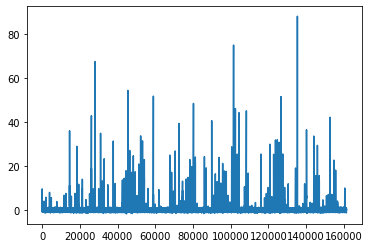

In [10]:
plt.close()
plt.plot(obser)
plt.show()

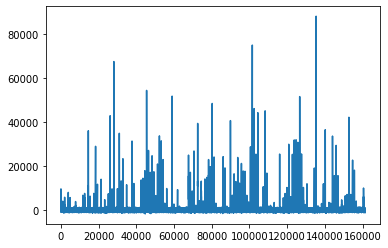

In [11]:
obser_to_int = [int(i) for i in obser_to_int*1000]
obser_to_int = np.asarray(obser_to_int)
plt.close()
plt.plot(obser_to_int)
plt.show()

In [13]:
obser /= max(obser)

In [14]:
int(1/(float(head['tay'])*10**-3))

813

In [15]:
write('obs.wav', int(1/(float(head['tay'])*10**-3)), obser)

In [12]:
write('obs_int.wav', int(1/(float(head['tay'])*10**-3)), obser_to_int)

In [43]:
fs, data = read('obs.wav')

In [44]:
fs

813

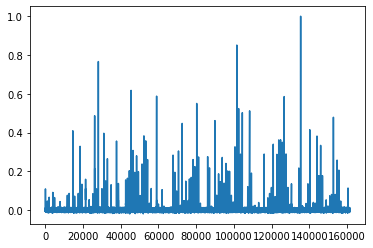

In [45]:
plt.close()
plt.plot(data)
plt.show()

In [46]:
help(write)

Help on function write in module scipy.io.wavfile:

write(filename, rate, data)
    Write a numpy array as a WAV file.
    
    Parameters
    ----------
    filename : string or open file handle
        Output wav file.
    rate : int
        The sample rate (in samples/sec).
    data : ndarray
        A 1-D or 2-D numpy array of either integer or float data-type.
    
    Notes
    -----
    * Writes a simple uncompressed WAV file.
    * To write multiple-channels, use a 2-D array of shape
      (Nsamples, Nchannels).
    * The bits-per-sample and PCM/float will be determined by the data-type.
    
    Common data types: [1]_
    
    =====================  ===========  ===========  =============
         WAV format            Min          Max       NumPy dtype
    =====================  ===========  ===========  =============
    32-bit floating-point  -1.0         +1.0         float32
    32-bit PCM             -2147483648  +2147483647  int32
    16-bit PCM             -32768      